# Anillos de polinomios

El manual de referencia para este bloc es [Sage Reference Manual: Polynomials](http://doc.sagemath.org/pdf/en/reference/polynomial_rings/polynomial_rings.pdf)

Algunos de los ejercicios y ejemplos están extraídos de las notas de trabajo de [Pascual Jara](http://www.ugr.es/~pjara) para la asignatura [Álgebra Conmutativa y Computacional](http://grados.ugr.es/matematicas/pages/infoacademica/guiasdocentes/actual/optativas/Algebra_Conmutativa_y_Computacional)

Existen varias formas de definir un anillo de polinomios en `sage`

In [1]:
P=PolynomialRing(QQ,['x', 'y', 'z'])

In [2]:
P

Multivariate Polynomial Ring in x, y, z over Rational Field

Para poder utilizar las variables del anillo de polinomios que hemos definido como objetos en `sage` debemos "inyectarlas" 

In [3]:
P.inject_variables()

Defining x, y, z


In [4]:
z

z

In [5]:
x^2

x^2

In [6]:
x in P

True

In [7]:
x/y in P

False

In [7]:
P==QQ['x','y','z']

True

In [8]:
P2.<x,y,z>=QQ[]

In [9]:
P2==P

True

## Test de primalidad, factorización

Para ver si un polinomio es primo, utilizamos `is_prime()`

In [10]:
P.<x,y>=QQ[]

In [11]:
c=x^3-y^2

In [12]:
c.is_prime()

True

In [13]:
(x^2+x^2-1).is_prime()

True

Podemos factorizar usando `factor()`

In [14]:
r =x^2-y^2

In [15]:
r.factor()

(x - y) * (x + y)

Y al igual que con enteros, podemos calcular el máximo común divisor

In [16]:
f =x*y-1
g= x^2+y^2-4

In [17]:
gcd(f,g)

1

## Polinomios en una variable

In [18]:
R=Zmod(2)['x']
R.inject_variables()

Defining x


Podemos calcular todos los polinomios mónicos con un grado determinado.

In [19]:
list(R.monics(of_degree=2))

[x^2, x^2 + 1, x^2 + x, x^2 + x + 1]

Esto se puede utilizar para encontrar todos los polinomios irreducibles de un determinado grado.

In [20]:
l=list(R.monics(of_degree=5))

In [21]:
[a for a in l if a.is_prime()]

[x^5 + x^2 + 1,
 x^5 + x^3 + 1,
 x^5 + x^3 + x^2 + x + 1,
 x^5 + x^4 + x^2 + x + 1,
 x^5 + x^4 + x^3 + x + 1,
 x^5 + x^4 + x^3 + x^2 + 1]

In [22]:
filter(is_prime,l)

[x^5 + x^2 + 1,
 x^5 + x^3 + 1,
 x^5 + x^3 + x^2 + x + 1,
 x^5 + x^4 + x^2 + x + 1,
 x^5 + x^4 + x^3 + x + 1,
 x^5 + x^4 + x^3 + x^2 + 1]

También podemos encontrar los mónicos hasta un grado determinado.

In [23]:
list(R.monics(max_degree=3))

[1,
 x,
 x + 1,
 x^2,
 x^2 + 1,
 x^2 + x,
 x^2 + x + 1,
 x^3,
 x^3 + 1,
 x^3 + x,
 x^3 + x + 1,
 x^3 + x^2,
 x^3 + x^2 + 1,
 x^3 + x^2 + x,
 x^3 + x^2 + x + 1]

Como ejemplo, veamos todos los polinomios irreducibles de $\mathbb Z_2[x]$ hasta grado 5

In [24]:
filter(is_prime,R.monics(max_degree=5))

[x,
 x + 1,
 x^2 + x + 1,
 x^3 + x + 1,
 x^3 + x^2 + 1,
 x^4 + x + 1,
 x^4 + x^3 + 1,
 x^4 + x^3 + x^2 + x + 1,
 x^5 + x^2 + 1,
 x^5 + x^3 + 1,
 x^5 + x^3 + x^2 + x + 1,
 x^5 + x^4 + x^2 + x + 1,
 x^5 + x^4 + x^3 + x + 1,
 x^5 + x^4 + x^3 + x^2 + 1]

Podemos seleccionar un elemento irreducible.

In [25]:
R.irreducible_element(3)

x^3 + x + 1

Un polinomio $p(x)\in R[x]$ se dice primitivo si la clase de $x$ genera $R[X]/(p(X))$

In [28]:
p=R.irreducible_element(3,algorithm='primitive')

In [29]:
I=p*R

In [30]:
I

Principal ideal (x^3 + x + 1) of Univariate Polynomial Ring in x over Ring of integers modulo 2 (using NTL)

In [31]:
Q=R.quo(_*R,'a')

In [32]:
Q

Univariate Quotient Polynomial Ring in a over Ring of integers modulo 2 with modulus x^3 + x + 1

In [33]:
a=Q.0

In [34]:
set(a^i for i in range(7))

{1, a, a + 1, a^2, a^2 + 1, a^2 + a, a^2 + a + 1}

In [35]:
len(_)

7

Vamos ahora a construir un cuerpo con 256 elementos.

In [36]:
p=R.irreducible_element(8)

In [37]:
Q=R.quo(p*R,'a')

In [38]:
Q

Univariate Quotient Polynomial Ring in a over Ring of integers modulo 2 with modulus x^8 + x^4 + x^3 + x^2 + 1

In [39]:
Q.is_field()

True

In [40]:
a=Q.0
len(set(a^i for i in range(2^8-1)))

255

La multiplicación en `Q` se puede hacer por logaritmos. Guardamos en una lista todas las potencias de `a`, que son todos los elementos de `Q`.

In [41]:
l=[a^i for i in range(2^8-1)]

Vamos a multiplicar `a^2+1` por `a^3+a` (el primero representa al 101 en binario, y el segundo a 10010, es decir, 5 y 18 en decimal, respectivamente). Calculamos su posición en la lista `l`, que coincide con el logaritmo en base `a`, y sumamos las posiciones.

In [42]:
l.index(a^2+1)

50

In [43]:
l.index(a^3+a)

51

In [44]:
l[101]

a^5 + a

In [45]:
(a^3+a)*(a^2+1)

a^5 + a

Si queremos calcular inversos, como $a^{255}=1$, tenemos que si $b=a^x$, entonces $$b^{-1}=1\times a^{-x}=a^{255-x}.$$

In [46]:
1/(a^2+1)

a^7 + a^5 + a^2 + a + 1

In [47]:
l[255-50]

a^7 + a^5 + a^2 + a + 1

Así es como se lleva a cabo la multiplicación y la división en [AES](https://es.wikipedia.org/wiki/Advanced_Encryption_Standard), aunque el polinomio que se usa en ese sistema es $x^8+x^4+x^3+x+1$.

<font color="red">**Ejercicio**</font>

*Demuestra que la clase de $x+1$ genera $\mathbb Z_2[x]/(x^8+x^4+x^3+x+1)$*

*Encuentra $\log_{x+1} x^5$*

Podemos pasar de un elemento de `Q` a `R` levantándolo.

In [48]:
p=a^8+1

In [49]:
p

a^4 + a^3 + a^2

In [50]:
pl=p.lift()

In [51]:
cf = pl.coefficients(sparse=False)

In [52]:
cf.reverse()

In [50]:
cf

[1, 1, 1, 0, 0]

También podemos pasar de coeficientes a polinomios de forma sencilla.

In [53]:
Q([0,0,1,1,1])

a^4 + a^3 + a^2

Los polinomios primitivos en una variable en $\mathbb Z_2[x]$ también tienen aplicaciones interesantes en la construcción de [LFSR](https://es.wikipedia.org/wiki/LFSR)s, que se usan para cifrar las comunicaciones GSM, [A5/1](https://es.wikipedia.org/wiki/A5/1).

Los LFSR (y las combinaciones de éstos) se usan para crear secuencias de números (pseudo)aleatorios. Estas secuencias las comparten el emisor y el receptor en una conversación. Para cifrar un mensaje basta con hacer posición a posición una suma en $\mathbb Z_2$ del mensaje y la secuencia creada, y enviar el resultado. El receptor repite la operación y recupera el mensaje original: $x+y+y=x$ en $\mathbb Z_ 2$.

## Interpolación y Teorema Chino de los Restos

Recordemos que dado $p(x)\in \mathbb K[x]$ y $a\in \mathbb K$, se tiene que $p(x)\equiv p(a) \bmod (x-a)$

Podemos usar este hecho para interpolar

In [54]:
P.<x>=QQ[]

In [55]:
CRT([1,2,1],[x-1,x-2,x])

1/2*x^2 - 1/2*x + 1

In [58]:
c=CRT([1,2,0],[x-1,x-2,x^2+1])
c

-1/10*x^3 + 3/5*x^2 - 1/10*x + 3/5

In [60]:
[c%p for p in [x-1,x-2,x^2+1]]

[1, 2, 0]

<font color="red">**Ejercicio**</font>

*Encuentra un polinomio en $\mathbb Q[x]$ que valga 1 en el 0, 2 en -4, y que sea congruente con $x$ módulo $x^2+2$*

## Resultantes

In [61]:
P.<x,y>=QQ[]
f =x*y-1
g= x^2+y^2-4

In [62]:
r=f.resultant(g,x)
r

y^4 - 4*y^2 + 1

In [63]:
P.inject_variables()

Defining x, y


In [64]:
z=var("z")

In [65]:
sols=solve(r.subs({y:z}),z)
sols

[z == -sqrt(sqrt(3) + 2), z == sqrt(sqrt(3) + 2), z == -sqrt(-sqrt(3) + 2), z == sqrt(-sqrt(3) + 2)]

In [66]:
eqx= (f.subs({y:sols[1].rhs()})).subs({x:z})

In [67]:
solve(eqx,z)

[z == 1/sqrt(sqrt(3) + 2)]

In [68]:
float(_[0].rhs())

0.5176380902050415

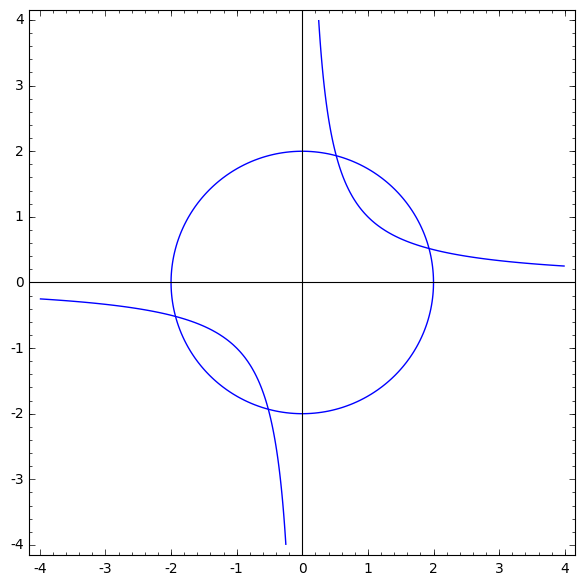

In [69]:
implicit_plot(f,(x,-4,4),(y,-4,4))+implicit_plot(g,(x,-4,4),(y,-4,4),axes=True)

Sin tratar $f$ y $g$ como polinomios podríamos haber resuelto esto más fácilmente sobre los complejos.

In [72]:
x,y=var("x,y")
f =x*y-1
g= x^2+y^2-4

In [75]:
solve([f,g],[x,y])

[[x == -sqrt(sqrt(3) + 2), y == -1/sqrt(sqrt(3) + 2)], [x == sqrt(sqrt(3) + 2), y == 1/sqrt(sqrt(3) + 2)], [x == -sqrt(-sqrt(3) + 2), y == -1/sqrt(-sqrt(3) + 2)], [x == sqrt(-sqrt(3) + 2), y == 1/sqrt(-sqrt(3) + 2)]]

In [77]:
x,y=var("x,y,a")
solve([x+a*y-1,x-2*y],[x,y])

ValueError: too many values to unpack

<font color="red">**Ejercicio**</font>

*Encuentra los puntos de intersección de la parábola $y=x^2$ y de la circunferencia unidad*

<font color="red">**Ejercicio**</font>

*[Omar Jayam](https://es.wikipedia.org/wiki/Omar_Jayam) era capaz de resolver cúbicas de la forma $x^3+bx=c$ mediante la intersección de dos cónicas. Para ello interseca la parábola $y=\frac{x^2}{\sqrt{b}}$ con el círculo con centro en $(c/(2b),0)$ y que pasa por el origen. La coordenada $x$ del punto de corte en el cuadrante positivo es la solución buscada*

*Utiliza este método para resolver $x^3+x=3$ (véase también [este](https://www.geogebra.org/m/rTV3y4Bb) recurso geogebra)*

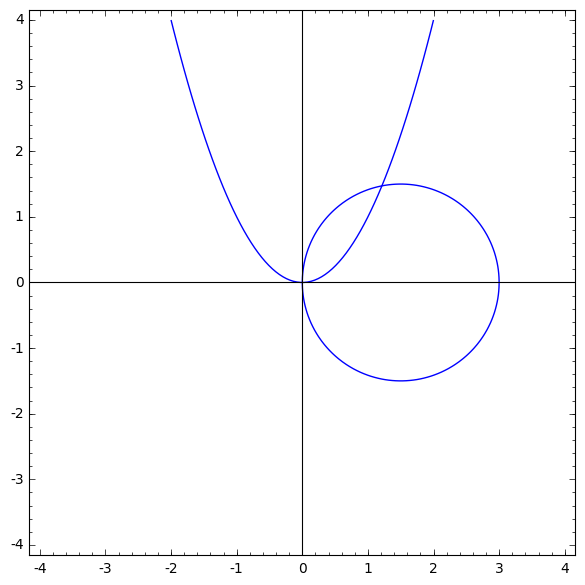

In [65]:
implicit_plot(y-x^2,(x,-4,4),(y,-4,4),axes=True)+implicit_plot((x-3/2)^2+y^2-9/4,(x,-4,4),(y,-4,4),axes=True)

## Órdenes monomiales

Por defecto se utiliza el graduado lexicográfico inverso `degrevlex`.

In [66]:
P.term_order()

Degree reverse lexicographic term order

In [67]:
P2.term_order()

Degree reverse lexicographic term order

In [68]:
x<y

False

In [69]:
x>y

True

Tenemos los siguientes órdenes a nuestra disposición:

- `degrevlex` graduado lexicográfico inverso, que es el que viene dado por defecto

- `lex` el lexicográfico

- `invlex` lexicográfico inverso

- `deglex` graduado lexicográfico

- Órdenes por bloques

*Orden lexicográfico*

Dados $a,b\in \mathbb N^n$, $a\preceq_{lex} b$ si la primera coordenada no nula de $b-a$ es positiva 

In [70]:
P=PolynomialRing(QQ,x,3,order='lex')
P.inject_variables()

Defining x0, x1, x2


Vamos a definir una lista con todos los monomios de grado total uno y dos

Para ello vamos a utilizar `WeightedIntegerVectors` que nos devuelve un iterador con todas las expresiones del primer argumento como combinaciones lineales nonegativas de los elements del segundo argumento

Después usaremos que un anillo de polinomios es `callable` y que si se le pasa un diccionario con elemento de la forma {multigrado:coeficiente}, devuelve un polinomio que es suma de esos términos

In [71]:
P({(1,2,1):-1, (0,1,0):4})

-x0*x1^2*x2 + 4*x1

In [72]:
ds = list(WeightedIntegerVectors(2,[1,1,1]))+list(WeightedIntegerVectors(1,[1,1,1]))
ms=[P({tuple(l):1}) for l in ds]

In [73]:
sorted(ms)

[x2, x2^2, x1, x1*x2, x1^2, x0, x0*x2, x0*x1, x0^2]

In [74]:
sorted([2,1,3])

[1, 2, 3]

In [75]:
sorted([x0,x1,x2])

[x2, x1, x0]

*Orden lexicográfico graduado*

Para $a,b\in \mathbb N^n$, $a\preceq_{deglex} b$ si $\sum a_i<\sum b_i$, o $\sum a_i=\sum b_i$ y $a\preceq_{lex} b$

In [76]:
P=PolynomialRing(QQ,x,3,order='deglex')

In [77]:
P.inject_variables()

Defining x0, x1, x2


In [78]:
ds = list(WeightedIntegerVectors(2,[1,1,1]))+list(WeightedIntegerVectors(1,[1,1,1]))
ms=[P({tuple(l):1}) for l in ds]

In [79]:
sorted(ms)

[x2, x1, x0, x2^2, x1*x2, x1^2, x0*x2, x0*x1, x0^2]

In [80]:
sorted([1,2,3])

[1, 2, 3]

*Orden lexicográfico graduado inverso*

Dados $a,b\in \mathbb N^n$, $a\preceq_{degrevlex} b$ si $\sum a_i<\sum b_i$, o $\sum a_i=\sum b_i$ y la primera coordenada no nula, empezando por la derecha, de $b-a$ es negativa.

In [81]:
P=PolynomialRing(QQ,x,3)
P.inject_variables()

Defining x0, x1, x2


In [82]:
ds = list(WeightedIntegerVectors(2,[1,1,1]))+list(WeightedIntegerVectors(1,[1,1,1]))
ms=[P({tuple(l):1}) for l in ds]
sorted(ms)

[x2, x1, x0, x2^2, x1*x2, x0*x2, x1^2, x0*x1, x0^2]

Tenemos una serie de comandos para acceder al monomio, coeficiente y término líder

In [83]:
P.<x,y>=QQ[]

In [84]:
f=x^2+2*x*y-y
f

x^2 + 2*x*y - y

In [85]:
sorted([x^2,x*y])

[x*y, x^2]

In [86]:
[f.lm(),f.lt(),f.lc(),f.degrees()]

[x^2, x^2, 1, (2, 1)]

In [87]:
f.coefficients()

[1, 2, -1]

In [88]:
f.monomials()

[x^2, x*y, y]

In [89]:
f.monomial_coefficient(x^2)

1

<font color="red">**Ejercicio**</font>

*Ordena mediante el orden lexicográfico y lexicográfico graduado todos los monomios en tres variables de grado 3*

*Compara los resultados*

## Algoritmo de la división

El resto de dividir un polinomio por una secuencia de polinomios depende en general del orden de los polinomios en la secuencia

In [90]:
P= PolynomialRing(QQ, ['x','y', 'z'], order='lex')
P.inject_variables()

Defining x, y, z


In [91]:
f=x^4*y^2+x^2*y^3*z-2*x*y^2*z^3-3*x^2*y*z^4
g1=x^3*y-2*x^2*z^2
g2=x^2*y^3+x*z^3
g3=x*y^2*z-x^2*y*z-3*x*y*x^2

In [92]:
f.reduce([g1,g2,g3])

-3*x^2*y*z^4 + 4*x^2*z^4 - 2*x*y^2*z^3 - x*z^4

In [93]:
f.reduce([g3,g2,g1])

-3*x^2*y*z^4 + 4*x^2*z^4 - 2*x*y^2*z^3 - x*z^4

Veamos otro ejemplo

In [94]:
f=x^2+x-y^2+y
f.reduce([x+y,x*y+1])

0

In [95]:
f.reduce([x*y+1,x+y])

0

<font color="red">**Ejercicio**</font>

*Dados los polinomios*
$$
\begin{array}{ll}
F = X^3 Y^2 Z + X^2 Y^3 Z^2 + 2 X Y Z - Y^4 + 1;\\
G_1 = X Y^2 + Y Z + Y + 2 Z;\\
G_2 = X Z^2 + Y - Z + 1;\\
G_3 = X Y Z + Y^2 Z^2 + X - Y + 2.\\
\end{array}
$$

1. *Determina la división de $F$ por $\{G_1,G_2,G_3\}$ con el orden lexicográfico para la ordenación dada por $X>Y>Z$*

2. *Haz lo mismo con el orden graduado lexicográfico*

3. *Haz lo mismo con el orden graduado lexicográfico inverso*



<font color="red">**Ejercicio**</font>

*Divide, con el orden lexicográfico, el polinomio $F$ por el conjunto, ordenado, de polinomios $\mathbb{H}=\{H_1,H_2\}$, siendo:*

1. $F=XYZ$;      $H_1=X+Z$;     $H_2=Y-Z$.

1. $F=XY^2-X$;    $H_1=XY+1$;    $H_2=Y^2-1$.

1. $F=XY^2-X$;    $H_1=Y^2-1$;   $H_2=XY+1$.

## Ideales y anillos cociente

Recordemos que en `sage` podemos hacer cálculos explícitos con ideales

Construyamos $\mathbb Q[x,y]/(y+x^2-1,x y-2y^2+2y)$ y veamos si es un cuerpo

In [96]:
P.<x,y>=QQ[]

In [97]:
a=(y+x^2-1,x*y-2*y^2+2*y)*P

In [98]:
Q=P.quotient(a)

In [99]:
Q

Quotient of Multivariate Polynomial Ring in x, y over Rational Field by the ideal (x^2 + y - 1, x*y - 2*y^2 + 2*y)

Si intentamos `Q.is_field()` nos dirá que no está implementado, ni tampoco `a.is_maximal()`. Intentemos ver si es primo.

In [100]:
a.is_prime()

False

Por tanto `Q` no es un cuerpo

Para la pertenencia de un elemento a un ideal, basta con usar `in`

In [101]:
(y^3-1)*(y+x^2-1)+(x^5)*(x*y-2*y^2+2*y) in a

True

In [102]:
x^6 in a

False

El anillo `Q` es también un espacio vectorial sobre $\mathbb Q$. Un sistema de generadores sobre $\mathbb Q$ es $\{ \bar{x}^n\bar{y}^m \mid n,m\in \mathbb N\}$, con $\bar{x}$ y $\bar{y}$ las clases de $x$ e $y$ en `Q`. Veamos cuántos de esos monomios son linealmente independientes. 

In [103]:
a.reduce(y^2)

y^2

In [104]:
a.reduce(y^3)

7/4*y^2 - 3/4*y

In [105]:
a.reduce(x)

x

In [106]:
a.reduce(x^2)

-y + 1

In [107]:
a.reduce(x*y)

2*y^2 - 2*y

De esta forma, una base de `Q` como $\mathbb Q$ espacio vectorial es $\{ 1, \bar{x}, \bar{y},\bar{y}^2\}$, y $\dim_{\mathbb Q}Q=4$

El comando `normal_basis` se puede utilizar para calcular esta base, en el caso en que  `Q` sea finito dimensional

In [108]:
a.normal_basis()

[y^2, y, x, 1]

<font color="red">**Ejercicio** </font>

*Calcula una base del $\mathbb Q$-espacio vectorial $\mathbb Q[x,y]/(x^3 y+x y^2, y^2 x+2 x)$*

### Operaciones básicas de ideales de polinomios

In [109]:
b=(x^3-x*y,y^4-x*y^3+x,x^4*y^3-x*y^2)*P

La intersección, $a\cap b$, se calcula:

In [110]:
a.intersection(b)

Ideal (4*x*y^2 - 3*x*y, 2*x^2*y + x*y, 2*x^4 - 2*x^2 - x*y, 128*y^5 - 128*y^4 + 128*x^3 + 101*x*y - 128*x) of Multivariate Polynomial Ring in x, y over Rational Field

La suma

In [111]:
a+b

Ideal (x^2 + y - 1, x*y - 2*y^2 + 2*y, x^3 - x*y, -x*y^3 + y^4 + x, x^4*y^3 - x*y^2) of Multivariate Polynomial Ring in x, y over Rational Field

El producto

In [112]:
a*b

Ideal (x^5 - x^3 - x*y^2 + x*y, -x^3*y^3 + x^2*y^4 - x*y^4 + y^5 + x*y^3 - y^4 + x^3 + x*y - x, x^6*y^3 + x^4*y^4 - x^4*y^3 - x^3*y^2 - x*y^3 + x*y^2, x^4*y - 2*x^3*y^2 + 2*x^3*y - x^2*y^2 + 2*x*y^3 - 2*x*y^2, -x^2*y^4 + 3*x*y^5 - 2*y^6 - 2*x*y^4 + 2*y^5 + x^2*y - 2*x*y^2 + 2*x*y, x^5*y^4 - 2*x^4*y^5 + 2*x^4*y^4 - x^2*y^3 + 2*x*y^4 - 2*x*y^3) of Multivariate Polynomial Ring in x, y over Rational Field

El cociente $a:b$

In [113]:
a.quotient(b)

Ideal (x*y - 2*y^2 + 2*y, x^2 + y - 1, 4*y^3 - 7*y^2 + 3*y) of Multivariate Polynomial Ring in x, y over Rational Field

El radical, $\sqrt{a}$

In [114]:
a.radical()

Ideal (x*y - 2*y^2 + 2*y, x^2 + y - 1) of Multivariate Polynomial Ring in x, y over Rational Field

<font color="red">**Ejercicio**</font>

*Calcula la intersección de los ideales $\mathfrak{a}=(X,Y^2Z,YZ^2)$ y $\mathfrak{b}=(X^3YZ,X^2Y,Y^2Z^3)$ en el anillo $\mathbb Q[X,Y,Z]$*

<font color="red">**Ejercicio**</font>

Determina los siguientes ideales de $\mathbb Q[X,Y,Z]$

1.  $\mathfrak{a}=(X,Y,Z)\cap(X-1,Y-1,Z-1)\cap(X+1,Y+1,Z+1)$

1. $\mathfrak{b}=(\mathfrak{a}:XYZ)$

1. $\mathfrak{c}=(\mathfrak{a}:X^3Y^2Z)$

<font color="red">**Ejercicio**</font>

Determina la suma y la intersección de los siguientes ideales
$$
\begin{array}{ll}
\mathfrak{a}=(X+Y^2+Y+1,X-Z^2+Z-1)\\
\mathfrak{b}=(XY-YZ+1,Y^2+Y-1)
\end{array}
$$